In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [6]:

# import the dataset
customer_churn=pd.read_csv("C:/Users/ADMIN/OneDrive/Desktop/mlapp2/Customer-Churn-Records.csv")

In [7]:
customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
customer_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [9]:
customer_churn.shape

(10000, 18)

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [11]:
customer_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [12]:
customer_churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [13]:
customer_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [14]:
# let me find the count of different  characters in each column

columns_for_count = [customer_churn['Geography'], customer_churn['Gender'], customer_churn['Tenure'],
                     customer_churn['NumOfProducts'],customer_churn['HasCrCard'],customer_churn['IsActiveMember'],customer_churn['Exited'],
                     customer_churn['Complain'],customer_churn['Satisfaction Score'],customer_churn['Card Type']]

def find_value_counts(columns):
    for column in columns:
        print(f"Value counts for column '{column.name}':")
        value_count = column.value_counts()
        print(value_count)
        print(" ")

find_value_counts(columns_for_count)



Value counts for column 'Geography':
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
Value counts for column 'Gender':
Male      5457
Female    4543
Name: Gender, dtype: int64
 
Value counts for column 'Tenure':
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
 
Value counts for column 'NumOfProducts':
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
 
Value counts for column 'HasCrCard':
1    7055
0    2945
Name: HasCrCard, dtype: int64
 
Value counts for column 'IsActiveMember':
1    5151
0    4849
Name: IsActiveMember, dtype: int64
 
Value counts for column 'Exited':
0    7962
1    2038
Name: Exited, dtype: int64
 
Value counts for column 'Complain':
0    7956
1    2044
Name: Complain, dtype: int64
 
Value counts for column 'Satisfaction Score':
3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: in

In [15]:
# check if there are null columns
customer_churn.isnull().any()

RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

In [16]:
# check if there are any duplicates
customer_churn.duplicated().sum()
# no duplicates

0

## Exploratory Data Analysis

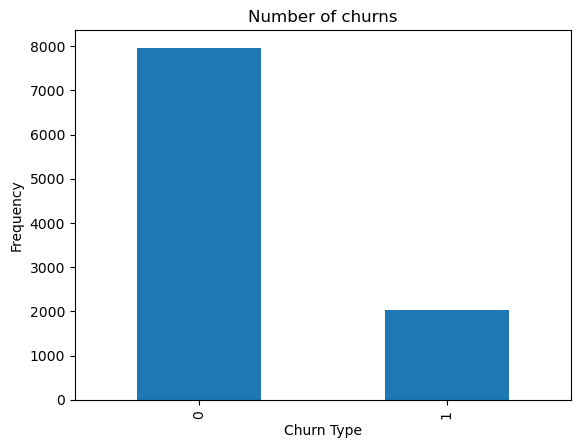

In [19]:
customer_churn['Exited'].value_counts().plot(kind='bar')
plt.xlabel("Churn Type")
plt.ylabel("Frequency")
plt.title("Number of churns");

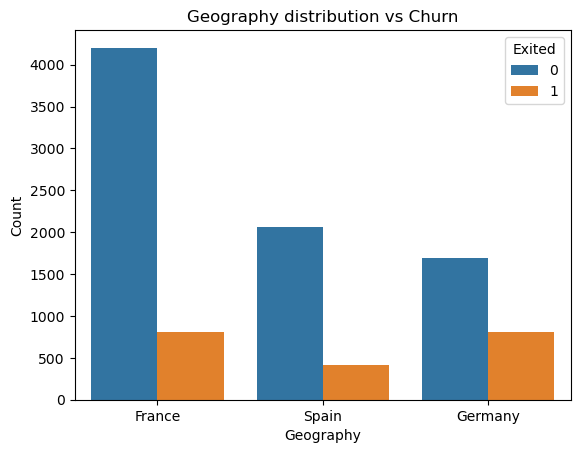

In [26]:
# Geography
sns.countplot(x='Geography',hue='Exited',data=customer_churn)
plt.title('Geography distribution vs Churn')
plt.xlabel('Geography')
plt.ylabel("Count")
plt.show()



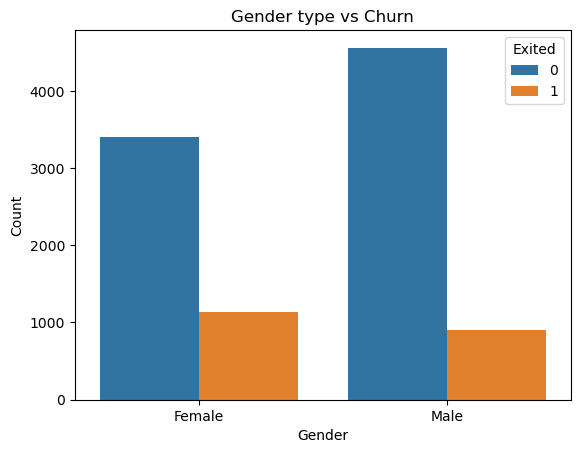

In [27]:
# Gender vs Churn
# Geography
sns.countplot(x='Gender',hue='Exited',data=customer_churn)
plt.title('Gender type vs Churn')
plt.xlabel('Gender')
plt.ylabel("Count")
plt.show()



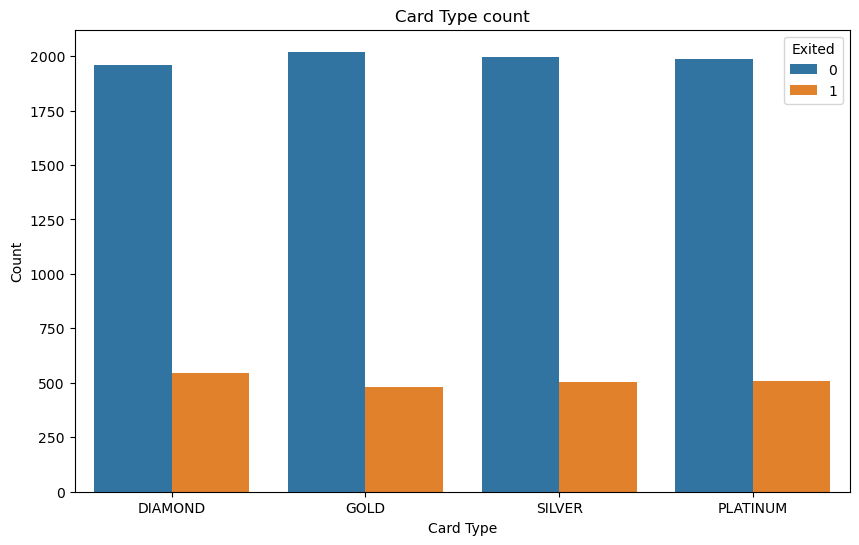

In [29]:
# card type distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='Card Type',hue='Exited', data=customer_churn)
plt.title('Card Type count')
plt.xlabel('Card Type')

plt.show()

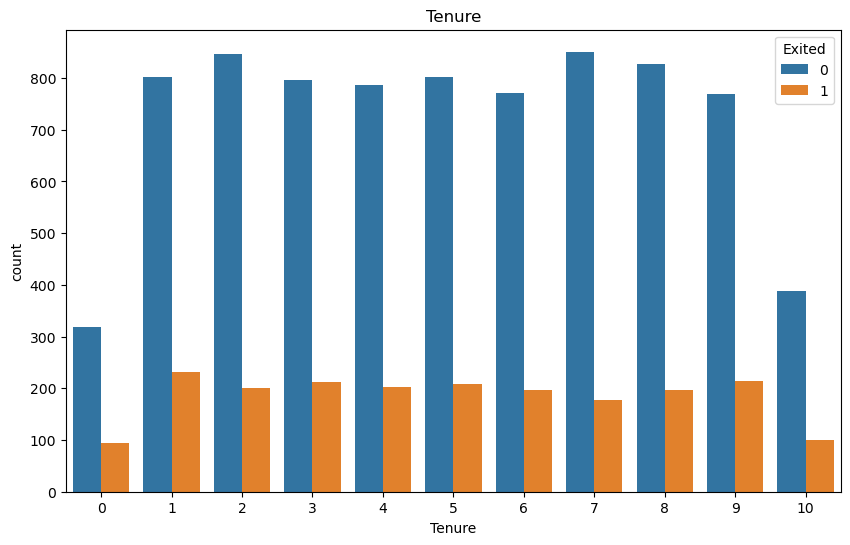

In [32]:

# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure',hue='Exited', data=customer_churn)
plt.title('Tenure')
plt.xlabel('Tenure')

plt.show()

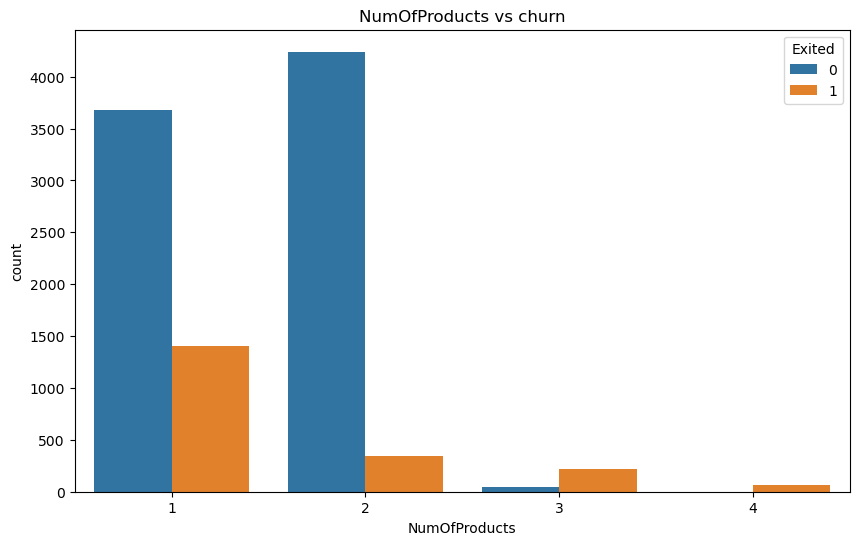

In [33]:


# Num of products vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts',hue='Exited', data=customer_churn)
plt.title('NumOfProducts vs churn')
plt.xlabel('NumOfProducts')

plt.show()



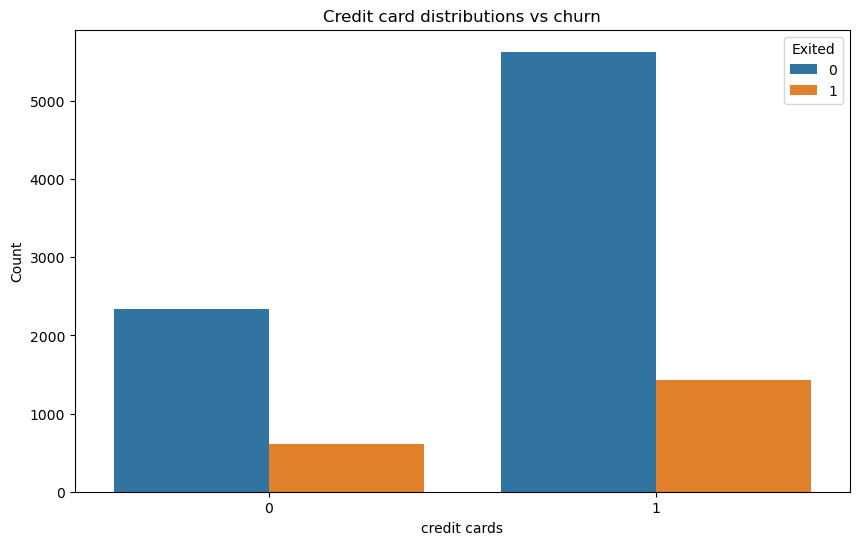

In [36]:
# Customers with crredit  cards vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCrCard',hue='Exited', data=customer_churn)
plt.title('Credit card distributions vs churn')
plt.xlabel('credit cards')
plt.ylabel("Count")
# plt.xticks(Tenure.index)
plt.show()

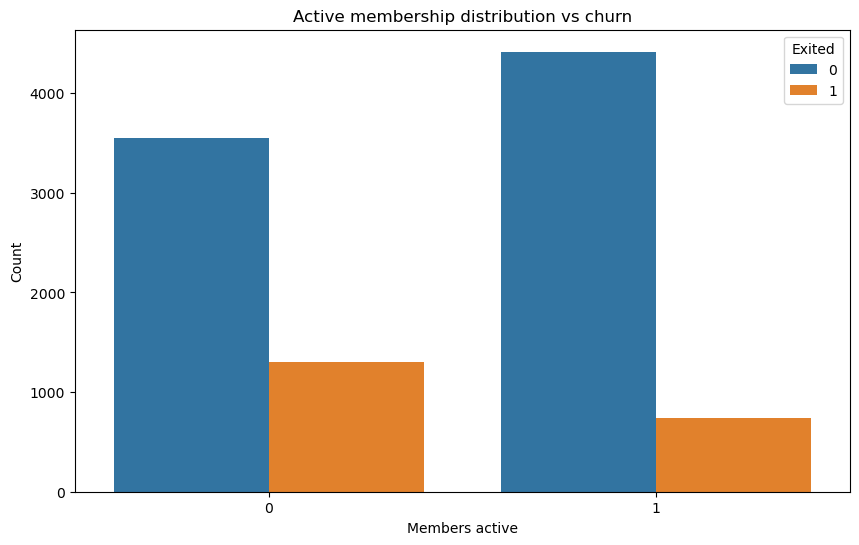

In [38]:
# active members vs churn 

plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember',hue='Exited', data=customer_churn)
plt.title('Active membership distribution vs churn')
plt.xlabel('Members active')
plt.ylabel("Count")

plt.show()

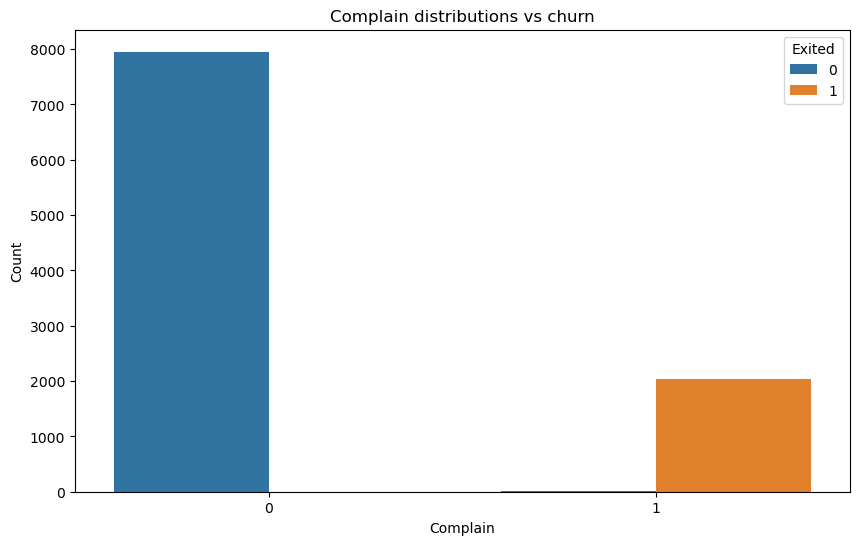

In [41]:


# number of complains vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Complain',hue='Exited', data=customer_churn)
plt.title('Complain distributions vs churn')
plt.xlabel('Complain')
plt.ylabel("Count")
# plt.xticks(Tenure.index)
plt.show()

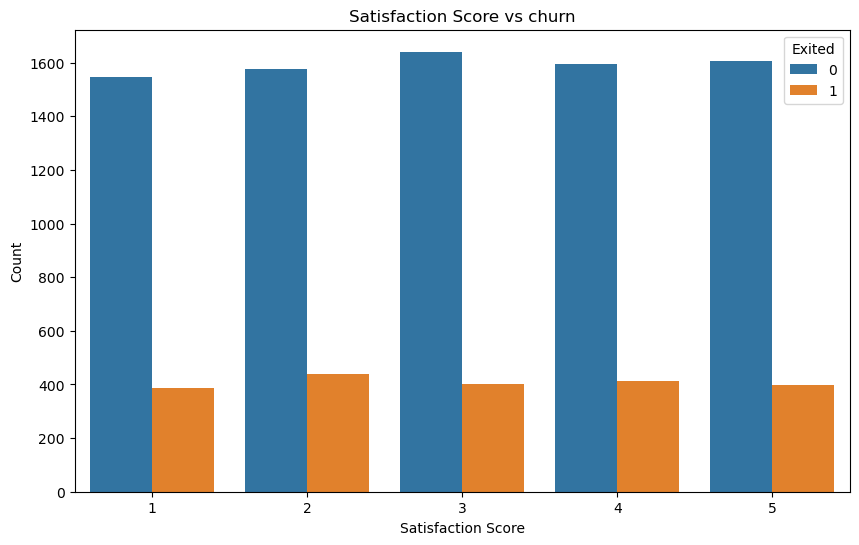

In [42]:
# Satisfaction score vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Score',hue='Exited',data=customer_churn)
plt.title('Satisfaction Score vs churn')
plt.xlabel('Satisfaction Score')
plt.ylabel("Count")
plt.show()

### plot histogram on continous variables

#### Credit score-plot

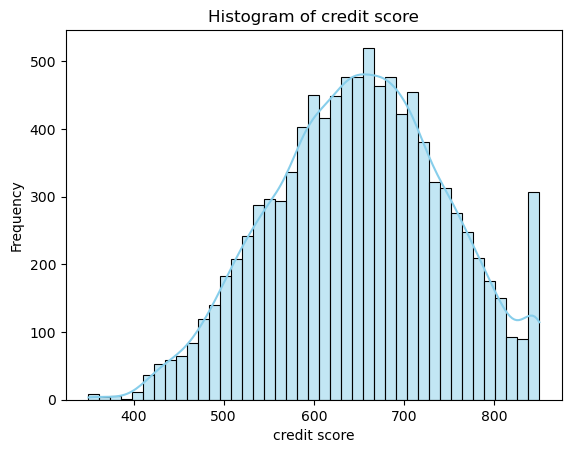

In [54]:
sns.histplot(customer_churn['CreditScore'], kde=True, color='skyblue')
plt.title('Histogram of credit score')
plt.xlabel('credit score')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
customers who churn-credit score histogram

In [48]:
churn=customer_churn[customer_churn['Exited']==1]
churn


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,4,GOLD,591
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


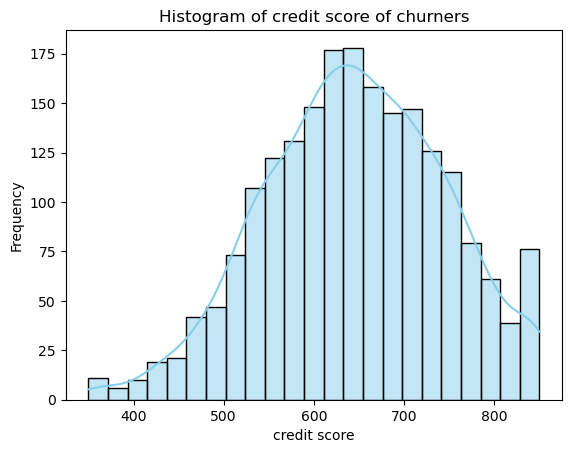

In [51]:
sns.histplot(churn['CreditScore'], kde=True, color='skyblue')
plt.title('Histogram of credit score of churners')
plt.xlabel('credit score')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

### Distribution of Balance


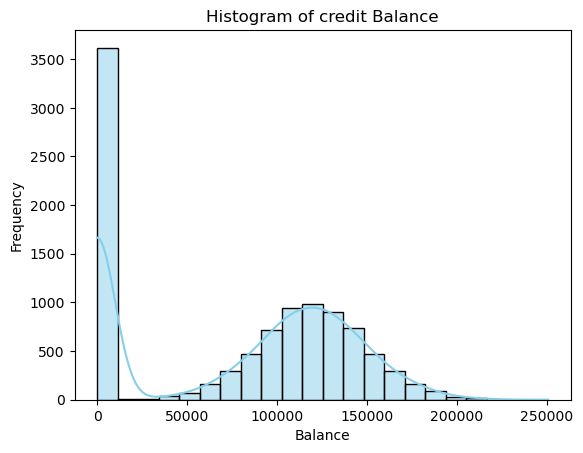

In [56]:
sns.histplot(customer_churn['Balance'], kde=True, color='skyblue')
plt.title('Histogram of credit Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

Age Distribution

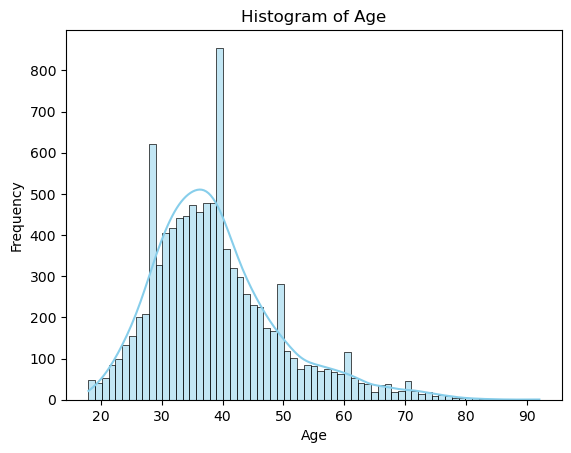

In [57]:
sns.histplot(customer_churn['Age'], kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

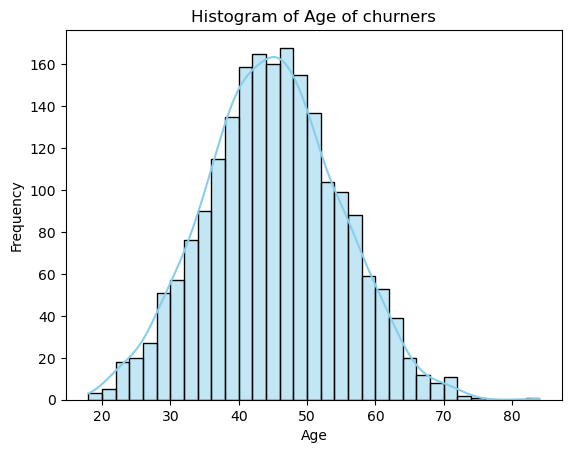

In [58]:
sns.histplot(churn['Age'], kde=True, color='skyblue')
plt.title('Histogram of Age of churners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

In [69]:
# let me drop some columns then use a boxplot to check if there are outliers
columns_to_drop=['RowNumber', 'CustomerId', 'Surname']

customer_churn.drop(columns=columns_to_drop,axis=1,inplace=True)


In [70]:
customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


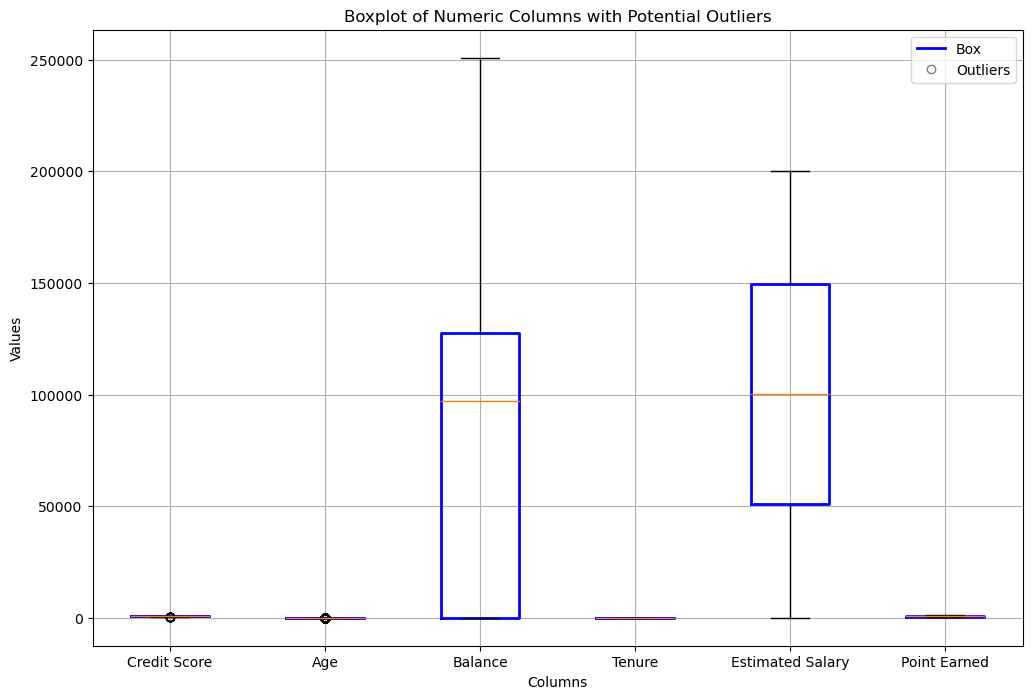

In [71]:

outliers_columns = [
    customer_churn['CreditScore'],
    customer_churn['Age'],
    customer_churn['Balance'],
    customer_churn['Tenure'],
    customer_churn['EstimatedSalary'],
    customer_churn['Point Earned']
]

fig, ax = plt.subplots(figsize=(12, 8))

# Creating a boxplot
bp = ax.boxplot(outliers_columns, labels=['Credit Score', 'Age', 'Balance', 'Tenure', 'Estimated Salary', 'Point Earned'])

# Adding title and labels
ax.set_title('Boxplot of Numeric Columns with Potential Outliers')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# Adding grid for better readability
ax.grid(True)

# Customize the whiskers, caps, and fliers
for box in bp['boxes']:
    # Change the box color
    box.set(color='blue', linewidth=2)

# Change color and style of fliers
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Adding a legend
ax.legend([bp["boxes"][0], bp["fliers"][0]], ['Box', 'Outliers'])

plt.show()


In [74]:
#products column is a categorical column but needs to be changed to a string
customer_churn['NumOfProducts'] = customer_churn['NumOfProducts'].astype(str)


In [73]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  object 
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ 

In [75]:
# I will divide the data into X and y
X= customer_churn.drop('Exited', axis=1)
y= customer_churn['Exited']


In [76]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [77]:
# we should first convert the X to be in uniform all, ahould be numerical and the numerical should be of standrad scale


In [78]:


categorical_features = customer_churn.select_dtypes(include=['object']).columns


print(categorical_features)


Index(['Geography', 'Gender', 'NumOfProducts', 'Card Type'], dtype='object')


In [85]:

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',  'Complain',
       'Satisfaction Score', 'Point Earned']
print(numerical_features)

['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']


In [86]:
ohe= OneHotEncoder()
sc= StandardScaler()
transformer=ColumnTransformer(
    [("cat_features",ohe,categorical_features),
     ("num_features",sc,numerical_features)],
    remainder="passthrough")

In [87]:
transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 1.        ,  0.        ,  0.        , ...,  1.97290849,
        -0.72113042, -0.63083912],
       [ 0.        ,  0.        ,  1.        , ...,  1.97290849,
        -0.00981614, -0.66625089],
       [ 1.        ,  0.        ,  0.        , ...,  1.97290849,
        -0.00981614, -1.01594219],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.97290849,
        -0.00981614, -0.18819191],
       [ 0.        ,  1.        ,  0.        , ...,  1.97290849,
        -0.72113042, -1.18414813],
       [ 1.        ,  0.        ,  0.        , ..., -0.50686588,
        -0.00981614,  1.34779392]])

In [88]:
# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# since the dataset was ibalanced, we are going to use smote to balance it
# we will balance on the training set . using the whole dataset to train may cause leakages hence unreliable resukt

In [89]:

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




In [98]:
# initialize the models and the pipelines

knn = KNeighborsClassifier()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
exc=ExtraTreesClassifier()

models = [knn,gbc,rfc,exc]

for model in models:

    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_pred, y_test)
    probability=model.predict_proba(X_test[:5])

    print (f'model : {model} and   accuracy is : {accuracy}')
    print(f'model :{model} and probability is:{probability}')
    print("")     


model : KNeighborsClassifier() and   accuracy is : 0.998
model :KNeighborsClassifier() and probability is:[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

model : GradientBoostingClassifier() and   accuracy is : 0.998
model :GradientBoostingClassifier() and probability is:[[1.40275155e-03 9.98597248e-01]
 [9.96942796e-01 3.05720420e-03]
 [9.99765392e-01 2.34608183e-04]
 [9.99340224e-01 6.59775581e-04]
 [2.36794259e-03 9.97632057e-01]]

model : RandomForestClassifier() and   accuracy is : 0.998
model :RandomForestClassifier() and probability is:[[0.11 0.89]
 [0.99 0.01]
 [1.   0.  ]
 [0.97 0.03]
 [0.09 0.91]]

model : ExtraTreesClassifier() and   accuracy is : 0.998
model :ExtraTreesClassifier() and probability is:[[0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]]



In [100]:
confusion_matrix(y_test, y_pred)

array([[1581,    4],
       [   0,  415]], dtype=int64)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       0.99      1.00      1.00       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [102]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_pred})

df

,actual values,predictions
2743,1,1
6287,0,0
745,0,0
8521,0,0
4899,1,1
...,...,...
365,0,0
6097,1,1
525,0,0
9443,1,1
